In [6]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable 

In [7]:
df = pd.read_csv("../data/6.dataframe_analisis.csv", index_col = 0)

# Se hace esto para resetear los índices
df.reset_index(drop=True , inplace=True)
df.head(2)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,...,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [8]:
lista_eliminar= ['q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5',
       'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other',
       'q40_part_1', 'q40_part_2', 'q40_part_3', 'q40_part_4', 'q40_part_5',
       'q40_part_6', 'q40_part_7', 'q40_part_8', 'q40_part_9', 'q40_part_10',
       'q40_part_11', 'q40_other', 'q42_part_1', 'q42_part_2', 'q42_part_3',
       'q42_part_4', 'q42_part_5', 'q42_part_6', 'q42_part_7', 'q42_part_8',
       'q42_part_9', 'q42_part_10', 'q42_part_11', 'q42_other']

In [9]:

df["q3_país"].unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Russia', 'Turkey',
       'Australia', 'Nigeria', 'Greece', 'Belgium', 'Japan', 'Egypt',
       'Singapore', 'Brazil', 'Poland', 'China',
       'Iran, Islamic Republic of...', 'United States of America',
       'Italy', 'Viet Nam', 'Israel', 'Peru', 'South Africa', 'Other',
       'Spain', 'Bangladesh',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Switzerland', 'Algeria', 'Tunisia', 'Argentina', 'Sweden',
       'Colombia', 'I do not wish to disclose my location', 'Canada',
       'Chile', 'Netherlands', 'Ukraine', 'Saudi Arabia', 'Romania',
       'Morocco', 'Austria', 'Taiwan', 'Kenya', 'Belarus', 'Ireland',
       'Portugal', 'Hong Kong (S.A.R.)', 'Denmark', 'Germany',
       'South Korea', 'Philippines', 'Sri Lanka', 'United Arab Emirates',
       'Uganda', 'Ghana', 'Malaysia', 'Thailand', 'Nepal', 'Kazakhstan',
       'Ethiopia', 'Iraq', 'Ecuador', 'Norway', 'Czech Republic'],
      dtype=obje

In [10]:
paises_top = ['India','United States of America','Nigeria', 'China', 'Egypt', 'Russia', 'Spain']

In [11]:
df_top_5 = df[df["q3_país"].isin(paises_top)]


In [12]:
df

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,...,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Academics/Education,"1000-9,999 employees",...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Academics/Education,"1000-9,999 employees",...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
4,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Academics/Education,50-249 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,A laptop,Computers/Technology,"10,000 or more employees",...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN
25969,22-24,Man,China,Master’s degree,Student,1-3 years,Python,A personal computer / desktop,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,Academics/Education,"1000-9,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25971,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,A laptop,Online Service/Internet-based Services,"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


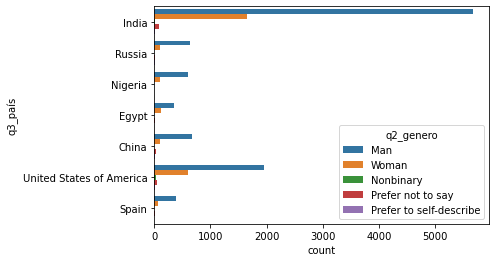

In [13]:
sns.countplot(data=df_top_5 , y= 'q3_país', hue=  "q2_genero");

- Realizaremos un análisis sobre la presencia de las mujeres en los cinco países que más encuestados residen. 

- En general, podemos observar que la presencia de hombres en el mundo del Data Analitics es mayor que la de la mujer, si bien esta diferencia es menor en la India, que es uno de los países donde más registros obtenemos. 
Es por ello que el objetivo de Adalab de potenciar la inserción de la mujer en el sector tecnológico no podría ser más acertado, y debería continuar en esa direccioón. 

- En un principio, Adalab se dirige al mercado español, ya que ofrece cursos presenciales. Desde la pandemia y debido al sector al que se enfoca, los cursos se hacen de manera 100% Online, lo que abre las posibilidades a conseguir que mujeres de todo el mundo se propongan este cambio. 
En España en general, o bien tenemmos una muestra pequeña de los encuestados o bien hay pocas personas en este sector, de ambos sexos. Pero una vez más, hay más hombres que mujeres, y es algo que queremos seguir cambiando. 
Tradicionalmente es un país dónde la mujer ha tardado más en introducirse en el mercado laboral y este puede ser el punto de donde nace esta gran diferencia. 
Actualmente, hay leyes que luchan por la igualdad de sexos en puestos de responsabilidad, la igualdad de salarios y de condiciones laborales en general. Por esto debemos seguir en esta dirección y dedicar nuestros esfuerzos a que lass mujeres españolas realicen este cambio y se formen en Data Analitics. 

- Con los resultados de esta encuesta, observamos que la distancia entre hombres y mujeres en el sector tecnológico es muy amplia en casi todos los países. No obstante, pensamos que los países en los que se le da más importancia a este sector es donde deberíamos poner el foco. Estos son: India, Rusia, Nigeria, Egipto, China y Estados Unidos. 

- Destaca en número de personas que han contestado nuestra encuesta y que se encuentran en este sector la India, cosa que no debería sorprender, ya que proporcionalmente es el país con más población a nivel mundial. Seguramente se externaliza gran parte del trabajo debido a los bajos salarios que se ofrecen y es por ello que hay más personas dedicadas a este sector. 
Creemos que puede ser interesante formar a las mujeres de este país, y que de manera remota o viajando, consigan mejorar sus condiciones laborales y de vida. 

- El segundo país con mayor número de personas dedicadas al sector es EEUU, y este dato puede sorprender ya que el segundo país con más población a nivel mundial es China, un país que por otra parte está tecológicamente muy avanzado. 
Una vez más, en EEUU , la distancia entre hombres y mujeres dedicadas a este sector es enorme. Esto puede deberse a que en muchos estados miembros, los derechos de las mujeres a acceder a ciertos empleos o percibir salarios justos no están reconocidos. En general, sorprende ver que esta cultura sigua negándose a unirse a otros 187 países para ratificar la Convención de las Naciones Unidas sobre la Eliminación de Todas las Formas de Discriminación contra la Mujer, y nos da una idea del porqué de esta gran brecha. 
Una de las facilidades de este sector es el poder encontrar trabajo a nivel mundial, mas teniendo como idioma el Inglés, y pensamos que es otro buen mercado al que podríamos dirigir este bootcamp.  

- Nigeria es conocido como "el gigante de África" debido a la gran población que tiene y su economía, pero también es conocida por estar bastante atrasada en cuanto al índice de desarrollo humano (indicador elaborado por las Naciones Unidas). Por ello es otro mercado en el que nos gustaría introducirnos, una vez más, para mejorar las condiciones de vida de lass mujeres de este país, que tradicionalmente ha seguido siendo bastante machista. 


- Nigeria pais con 43,31 de poblacion joven PIB
- Rusia 66.495.134	76.950.926	145.558.000
- EEUU H164.224.068	M167.669.677 
- Egipto 954.413 mujeres y 969.511 hombres egipto 
- Spain 23.236.999 hombres 24.195.806 mujeres 
- India La población masculina es el 51,96% bastante superior a la femenina, que es del 48,04%. 1,408 miles de millones 
- China 1,412 millones habitantes 

---

RELACIÓN ENTRE AÑOS DE EXPERIENCIA Y GENERO 


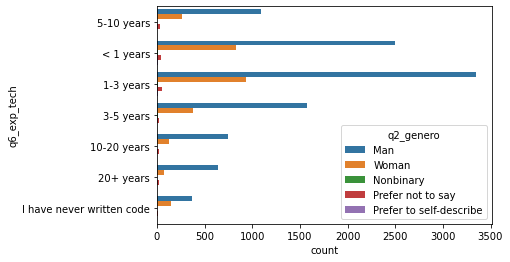

In [14]:
sns.countplot(data=df_top_5 , y= 'q6_exp_tech', hue=  "q2_genero");

¿ Cuál es la relación entre género y aós de experiencia? Años de experiencia y género, podemos ver que la mujer se ha incorporado más tarde al mercado laboral.

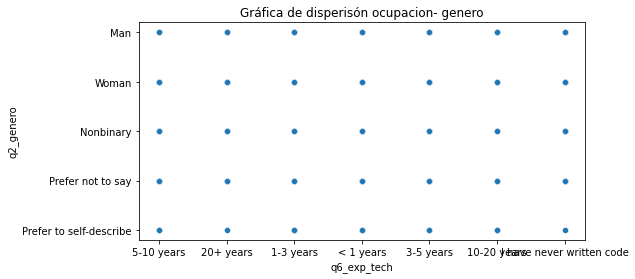

In [15]:
plt.figure(figsize =(8,4))

fig = sns.scatterplot(x='q6_exp_tech' , y='q2_genero' , data = df)

fig.set_title('Gráfica de disperisón ocupacion- genero')

plt.show()

- A estas alturas, no nos sorprende que una vez más sean los hombres los que más experiencia laboral tienen. Si cabe destacar que en esta comparación encontramos menor distancia entre hombres y mujeres, aunque sigue siendo bastante grande.

- Esto puede deberse a que las mujeres, tradicionalmente y lamentablemente independientemente de la cultura, se ha introducido más tarde en el mercado laboral. 
No obstante, cabe destacar que cuanta menos experiencia, mas se acorta esta distancia. El sector tecnológico está en auge y actualmente ya hay más mujeres animándose a introducirse en este mercado. 